# Regression

Lineare Regressionen werden unter anderem verwendet, um Zusammenhänge zwischen Variablen in der Umwelt zu erkennen und zu beschreiben.
Wir schauen uns in diesem Skript den Zusammenhang zwischen der mittleren Anzahl an Frosttagen und der jeweiligen Höhe über Normal Null (Meeresspiegel) an. Ein Frosttag wird dann gezählt, wenn die minimale Tagestemperatur unter 0 °C erreicht.

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Der Download der mittleren Anzahl an Frosttagen 1981 -2010 erfolgt über das Climate Data Center des Deutschen Wetterdienstes. 

In [203]:

# import os
# os.system("cd data && wget  https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/multi_annual/mean_81-10/Frosttage_1981-2010.txt")
# os.system("cd data && wget  https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/multi_annual/mean_81-10/Frosttage_1981-2010.txt")

Einlesen der Daten:

In [204]:
data = pd.read_csv("data/Frosttage_1981-2010.txt",sep=";", encoding = "ISO-8859-1")
meta = pd.read_csv("data/Frosttage_1981-2010_Stationsliste.txt",sep=";", encoding = "ISO-8859-1")


Die Daten enthalten Werte je Messstation.

Wir führen die Daten zusammen anhand der Metadaten (Stationshoehen) und Messdaten mit der gemeinsamen der Spalte "Stations_id":

In [205]:
data_merged = data.merge(meta,on="Stations_id")


Darstellen der Daten:
Die Spalte "Jahr" enthält die mittleren Frosttage pro Jahr.

<AxesSubplot: xlabel='Stationshoehe', ylabel='Jahr'>

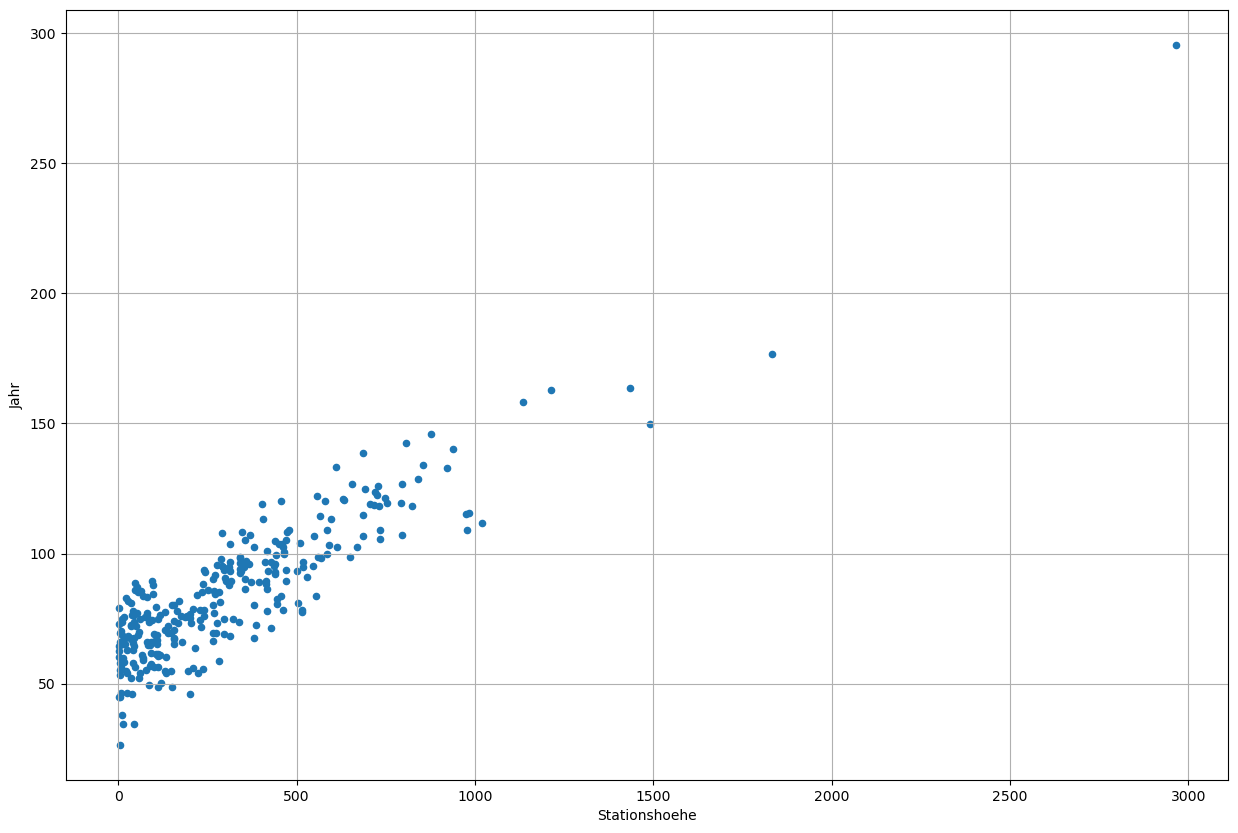

In [214]:
data_merged.plot.scatter(y="Jahr",x="Stationshoehe",
                         figsize=(15,10),grid = True)

Gesucht wird eine lineare Funktion, die den Zusammenhang zwischen einer abhängigen Variable (Zielgröße) und unabhängigen Variable möglichst gut beschreibt. 

$\begin{equation}y_i = {\beta} *{x}_{i} + \alpha
\end{equation}$

Die Regressionsparameter "beta" und "alpha" werden mittles der Methode der kleinsten Fehlerquadrate geschätzt. Dabei wird die Summe der quadrierten Kleinste-Quadrate-Residuen minimiert.

Residuen = Abweichungen zwischen Beobachtungswerten und den vorhergesagten Werten aller Beobachtungen.

1. Bestimmen der Mittelwerte $\bar{x}$ und $\bar{y}$

2. Berechnen der Steigung der Regressionsgeraden
  
$\begin{equation}
\beta = \frac{\sum(x_i – \bar{X}) (y_i – \bar{y})} {\sum(x_i – \bar{x})^2}
\end{equation}$

3. Bestimme den Achsenschnittpunk der Regressionsgeraden

$\begin{equation}
\alpha = \bar{y} – \beta \bar{x}
\end{equation}$

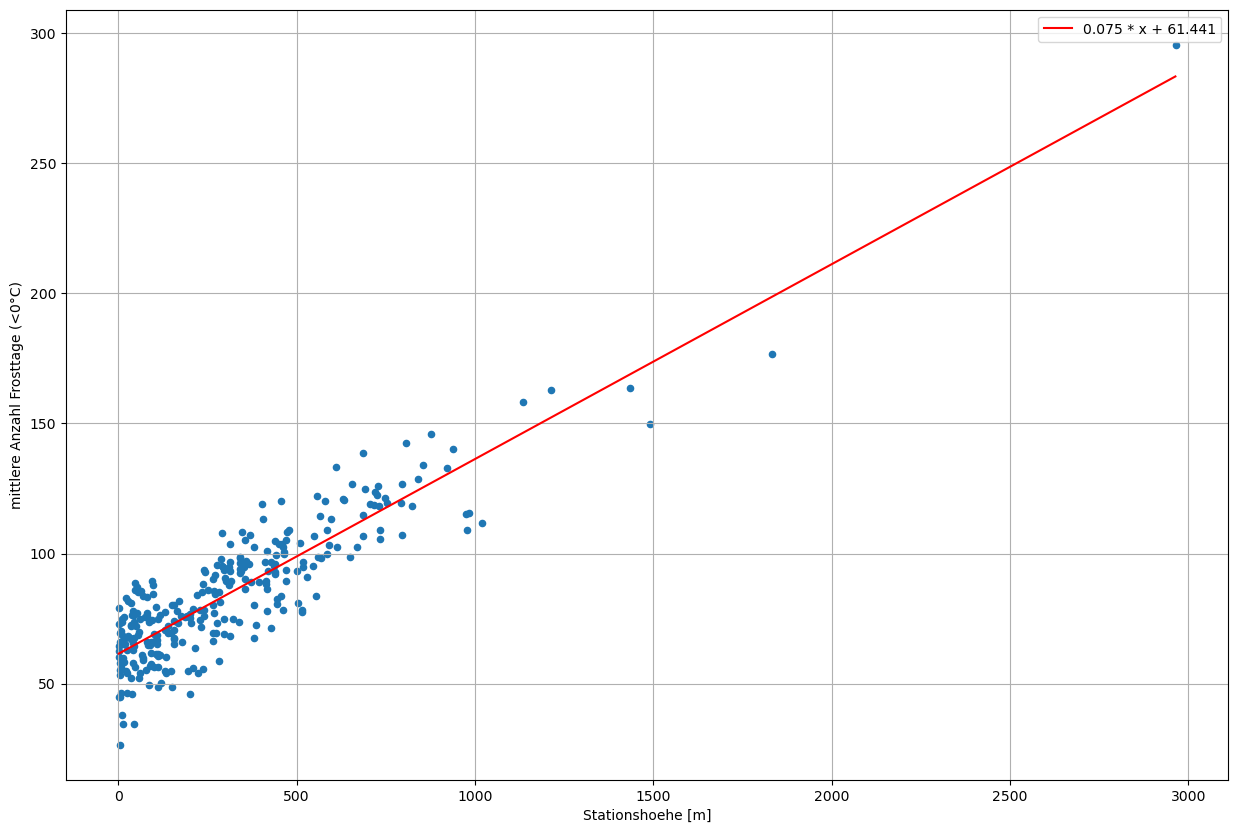

In [212]:
def estimate_regression_parameters(x,y):
    mu_x = x.mean() # Mittelwert x
    mu_y = y.mean() # Mittelwert y
    beta = np.sum((x- mu_x)*(y - mu_y))/(np.sum((x-mu_x)**2)) # Steigung
    alpha = mu_y - mu_x * beta # Schnittpunkt mit Y-Achse
    return beta, alpha

x_var = 'Stationshoehe'
y_var = "Jahr"
y_label = "mittlere Anzahl Frosttage (<0°C)"
x_label = "Stationshoehe [m]"
x = data_merged[x_var]
y = data_merged[y_var]

beta, alpha = estimate_regression_parameters(x=x,y=y)

x_reg = np.arange(x.min(), x.max()) # Wertebereich
y_reg = beta * x_reg + alpha # f(x) der linearen Regression

data_merged.plot.scatter(y = "Jahr",x = x_var,
                         figsize = (15,10),
                         ylabel = y_label, xlabel = x_label,grid = True)
plt.plot(x_reg,y_reg,color = "red", 
         label = f"{beta.round(3)} * x + {alpha.round(3)}")
plt.legend()

Wir entfernen nun den Wert mit der größten Stationshöhe und berechnen die Regressionsparameter neu.

In [ ]:

maximaler_Wert = data_merged[x_var].max()
data_changed = data_merged[~(data_merged.Stationshoehe == maximaler_Wert )]

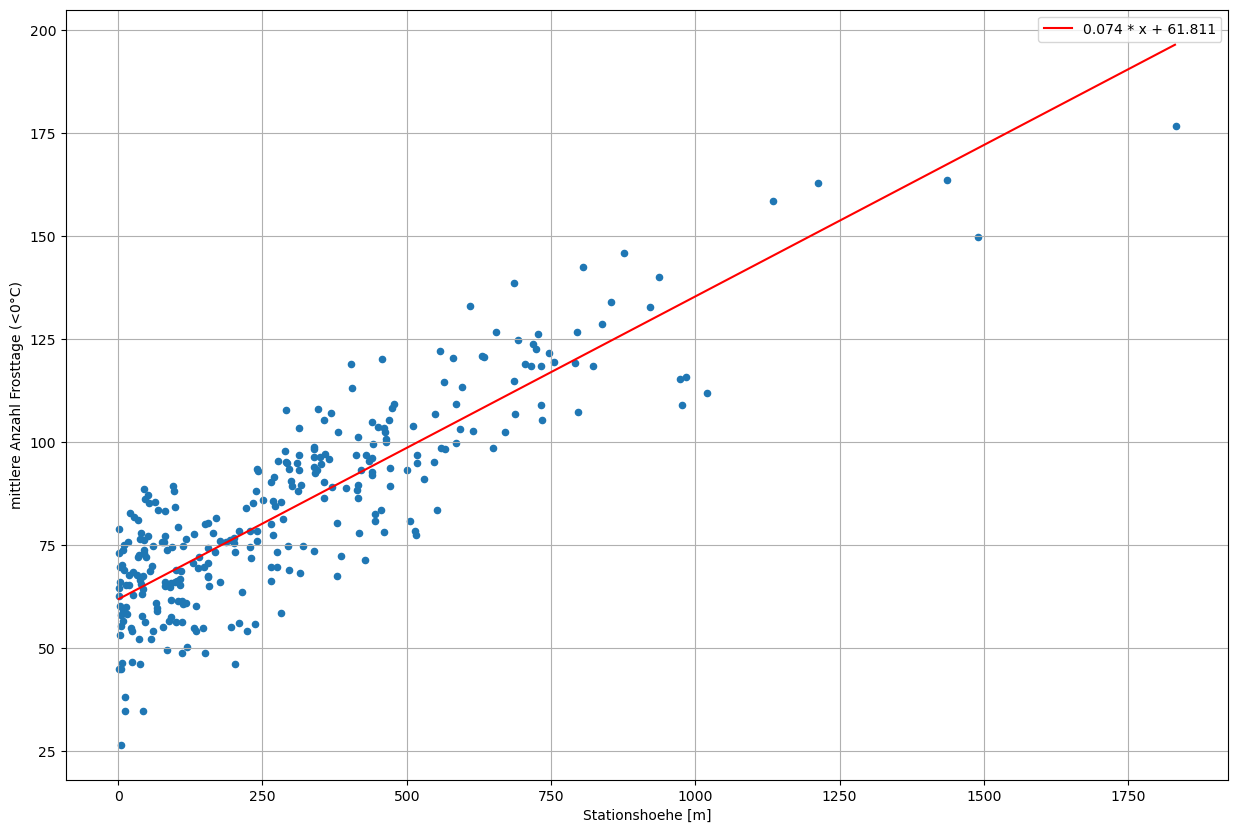

In [213]:


x = data_changed[x_var]
y = data_changed[y_var]
beta, alpha = estimate_regression_parameters(x=x,y=y)

x_reg = np.arange(x.min(), x.max()) # Wertebereich
y_reg = beta * x_reg + alpha # f(x) der linearen Regression

data_changed.plot.scatter(y = "Jahr",x = x_var,
                         figsize = (15,10),
                         ylabel = y_label, xlabel = x_label,grid = True)
plt.plot(x_reg,y_reg,color = "red", 
         label = f"{beta.round(3)} * x + {alpha.round(3)}")
plt.legend()

**Frage**: 
- Ändert sich die Regressionsparameter, wenn der maximale Wert entfernt wird?